In [ ]:
pip install opendatasets --upgrade--quiet


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --upgrade--quiet


## Download the Data


In [ ]:
!pip install jovian opendatasets --upgrade --quiet
!pip install -q kaggle 
import urllib.request
import opendatasets as od

In [ ]:

download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: liorbirendorf
Your Kaggle Key: ··········


100%|██████████| 269M/269M [00:03<00:00, 73.0MB/s]


## USA Accidents


Car accidents are a huge problem in our world. Nearly 1.3 million people die internationally every year from car accidents and in addition up to 50 million people are injured.
Many governments collect accident records and make these data publicly available.
In this project I took a dataset that is covers 49 states of the USA. The accident data are collected from February 2016 to Dec 2021, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 2.8 million accident records in this dataset.

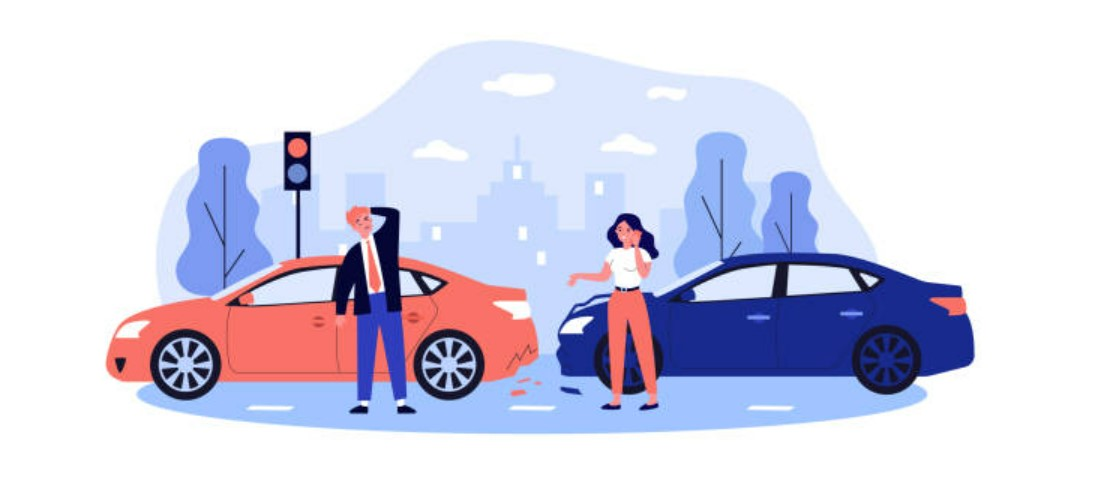

In [ ]:
data_filename='/content/us-accidents/US_Accidents_Dec21_updated.csv'

In [ ]:
import jovian
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error as mse

In [ ]:
df = pd.read_csv(data_filename) 

In [ ]:
df=df.copy()

## Exploratory analysis & visualization using Pandas&Numpy



Get information about the Columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [ ]:
df.describe() # show a statistic information about the data

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)
#i wanted to see how much numaric data I have to work with

14

# Checking the Percentage of missing values per column


In [ ]:
missing_percentages=df.isna().sum().sort_values()/len(df)
missing_percentages

ID                       0.000000e+00
Crossing                 0.000000e+00
Give_Way                 0.000000e+00
Junction                 0.000000e+00
No_Exit                  0.000000e+00
Railway                  0.000000e+00
Roundabout               0.000000e+00
Station                  0.000000e+00
Stop                     0.000000e+00
Traffic_Calming          0.000000e+00
Traffic_Signal           0.000000e+00
Turning_Loop             0.000000e+00
Country                  0.000000e+00
Amenity                  0.000000e+00
State                    0.000000e+00
End_Lng                  0.000000e+00
Severity                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Start_Lng                0.000000e+00
End_Lat                  0.000000e+00
County                   0.000000e+00
Bump                     0.000000e+00
Description              0.000000e+00
Side                     0.000000e+00
Distance(mi)

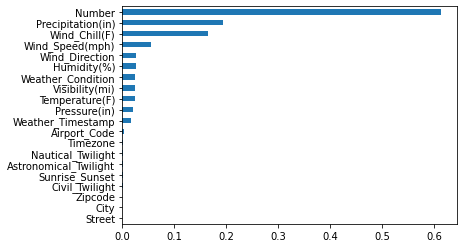

In [ ]:
missing_percentages[missing_percentages != 0].plot(kind='barh')
#Show the bar plot that containes the values that are not missing

As we can see there is more then half of the data that is missing in columan number
I'm gone to clean this data columns beacuse it is not useful.

##Remove columns that I don't want to use.



In [ ]:
newdf=df.drop(['Number'], axis = 1)
newdf

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


I want to see the new plot of the missing values.

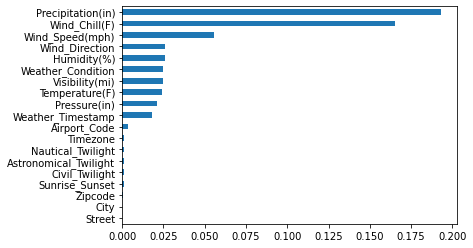

In [ ]:
missing_percentages=newdf.isna().sum().sort_values()/len(df)
missing_percentages
missing_percentages[missing_percentages != 0].plot(kind='barh')
#Show the bar plot that containes the values that are not missing

In [ ]:
df1=newdf.dropna()
df1.isna().sum()

ID                       0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
S

## Ask and answer questions

The main purpose of analyzing the data within this dataset, is to first fully understand what is going on.

Questions that we can ask and check about them:

1.which 5 cities have the highest number of accidents? 

2.Does New York show up in the data? If yes, why is the count lower if this the most populated city

3.What times are accidents most likely to occur within a day? What about monthly?

4.What is the percentage of accident occurances during the day? How about during the night?

5.What side of the road are more accidents happen?

6.What top 10 weather conditions may cause an car accident?


I can already hypothesize with a couple things  Accidents will occur in a time where everybody is out, such as the summer and during the day light. Major cities with a larger population are more likely to have more vehicle accidents.

Columns I'll analyze:

* City
* Start Time
*Weather




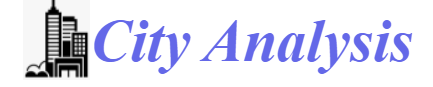

In [ ]:
df1.City

0               Dublin
4           Cincinnati
7            Cleveland
9          Westerville
10          Cincinnati
              ...     
2845337      Riverside
2845338      San Diego
2845339         Orange
2845340    Culver City
2845341       Highland
Name: City, Length: 2207325, dtype: object

I want to see how much cities I have in my data

In [ ]:
cities= len(df1.City.unique())
cities
#There is 9723 cities in the data.


9723

### I want to see how much accidents happend in the top 5 cities.

In [ ]:
cities_by_accident = df1.City.value_counts()
cities_by_accident.head()


Miami          97723
Los Angeles    56471
Orlando        49691
Dallas         33052
Houston        28385
Name: City, dtype: int64

### New York is one of the most populated cities in the US.
### As we can think, the most populated city have a higher chanches to have moltipul accidentes.
### But NY didn't presentes in the 5 top cities that have the most accidentes.
### I want to see if NY is in the data.





## **Does New York show up in the data? If yes, why is the count lower if this the most populated city.**



In [ ]:
'New York' in df1.City

False

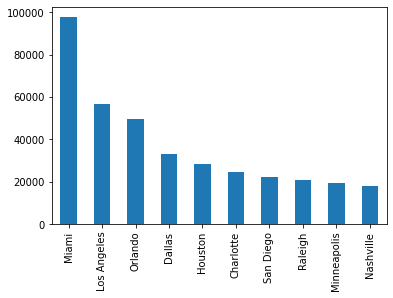

In [ ]:
cities_by_accident[:10].plot(kind='bar')


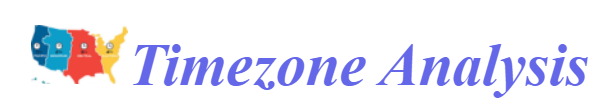

### In this dataset we have Start Time & End Time for the timings of each accident. Start_Time shows start time of the accident in local time zone. End_Time shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow.

In [ ]:
df1.Start_Time=pd.to_datetime(df1.Start_Time)
df1.Start_Time[0]
# I changed the start time column from string to date time.

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Timestamp('2016-02-08 00:37:08')

## **Which hour of the day  have the most accidents?**




Text(0.5, 1.0, 'Distribution of accidents by hour of the day')

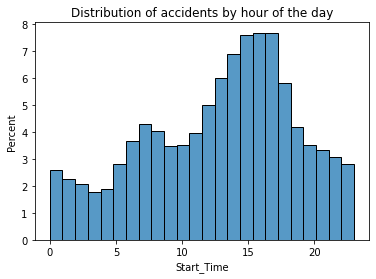

In [ ]:
sns.histplot(df1.Start_Time.dt.hour,bins=24,kde=False, stat='percent')
plt.title('Distribution of accidents by hour of the day')

###📌 Result

### As we can see most of the  accidents happend around 15:00 to 17:00 probably beacuse this is the loaded hours on the roads.


## **Which month of the day have the most accidents?**

Text(0.5, 1.0, 'Distribution of accidents by months')

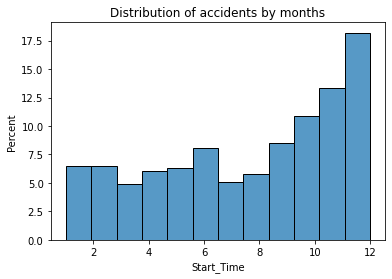

In [ ]:
sns.histplot(df1.Start_Time.dt.month,bins=12,kde=False, stat='percent',element='bars')
plt.title('Distribution of accidents by months')

##📌 Result

## Accidents are higher around the end of the year approaching the holidays


## **Is there more accidents during the night or the day?**
###The assumption is there will be more accidents durring the day because the road is more busy then the night hours


In [ ]:
Accident_Night = sum(df1.Sunrise_Sunset == "Night")
Accident_Night 

832572

In [ ]:
Accident_Day = sum(df1.Sunrise_Sunset == "Day")
Accident_Day  
# More accidents during the day, which makes sense of course.

1374753

In [ ]:
total_accidents= Accident_Night+ Accident_Day


In [ ]:
day= (Accident_Day/total_accidents)*100
print("There is a",day,'%' ,"accidents during the day hours")

There is a 62.28140396180898 % accidents during the day hours


In [ ]:
night= (Accident_Night/total_accidents)*100
print("There is a",night,'%' ,"accidents during the night hours")

There is a 37.71859603819102 % accidents during the night hours


##📌Result 

## most of the accidents happend during the day approximately beetween 15:00 to 17:00 and in the end of the year.


## **Moving on, what side of the road are more accidents happen?**

---



In [ ]:
side_of_road =  df1.groupby(['Side']).count()['ID']
side_of_road

Side
L     415728
R    1791597
Name: ID, dtype: int64

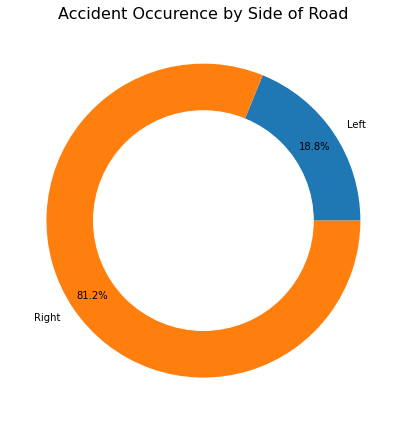

In [ ]:
# Let's visualize that

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))
label = ['Left', 'Right']
plt.pie(side_of_road, labels=label,
        autopct='%1.1f%%', pctdistance=0.85)
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
ax.set_title("Accident Occurence by Side of Road",fontdict={'fontsize': 16})
plt.tight_layout()
plt.show()

##📌 Result 

## most of the accidents happend in the right side of the road.

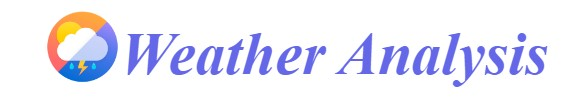


In [ ]:
weather_conditions = df1.groupby(['Weather_Condition']).count()['ID']
weather_conditions

Weather_Condition
Blowing Dust                136
Blowing Dust / Windy        140
Blowing Sand                  1
Blowing Snow                111
Blowing Snow / Windy         84
                           ... 
Tornado                       9
Widespread Dust              19
Widespread Dust / Windy      18
Wintry Mix                 3824
Wintry Mix / Windy           71
Name: ID, Length: 114, dtype: int64

In [ ]:

weather_conditions.sort_values(ascending=False)[:10]

Weather_Condition
Fair             1042415
Cloudy            334793
Mostly Cloudy     285317
Partly Cloudy     195367
Light Rain        106754
Light Snow         40157
Fog                37214
Haze               29095
Rain               24802
Fair / Windy       14483
Name: ID, dtype: int64

### **What top 10 weather conditions may cause an car accident?**

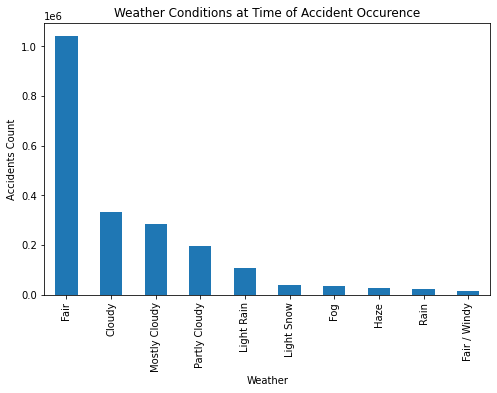

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
weather_conditions.sort_values(ascending=False)[:10].plot(kind='bar')
ax.set(title = 'Weather Conditions at Time of Accident Occurence',
       xlabel = 'Weather',
       ylabel = 'Accidents Count')
plt.show()

### What could cause a car accident. The answer, of course, is numerous factors, some of which we include in this analysis.

### I want to check the correletion in the data.


In [ ]:
corr = df1.corr()
corr.style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
Severity,1.000000,0.086238,0.089611,0.086241,0.089612,0.062377,-0.038539,-0.041909,0.032018,-0.042316,-0.011187,0.025306,0.004666,-0.003545,-0.002389,-0.035509,0.006676,0.040931,-0.003726,-0.001554,-0.001147,-0.014802,-0.001350,-0.002072,-0.009883,nan
Start_Lat,0.086238,1.000000,-0.180689,0.999996,-0.180684,0.084227,-0.491511,-0.496691,-0.003405,-0.298063,-0.109034,0.018353,-0.011388,-0.009374,-0.000258,-0.104312,0.011542,0.061205,-0.018362,0.000933,-0.005323,-0.124292,0.010632,-0.003714,-0.059146,nan
Start_Lng,0.089611,-0.180689,1.000000,-0.180684,0.999999,0.031635,0.050791,0.035470,0.170275,0.233655,0.044877,0.097210,0.024534,0.016105,-0.015906,0.059270,0.016740,-0.023546,0.004709,-0.016670,0.001356,0.043245,-0.044819,-0.009310,0.058880,nan
End_Lat,0.086241,0.999996,-0.180684,1.000000,-0.180680,0.084229,-0.491507,-0.496688,-0.003411,-0.298065,-0.109027,0.018358,-0.011389,-0.009375,-0.000258,-0.104319,0.011529,0.061191,-0.018360,0.000931,-0.005323,-0.124290,0.010641,-0.003714,-0.059149,nan
End_Lng,0.089612,-0.180684,0.999999,-0.180680,1.000000,0.031629,0.050795,0.035473,0.170271,0.233659,0.044880,0.097212,0.024535,0.016105,-0.015905,0.059267,0.016740,-0.023541,0.004709,-0.016670,0.001356,0.043244,-0.044818,-0.009310,0.058878,nan
Distance(mi),0.062377,0.084227,0.031635,0.084229,0.031629,1.000000,-0.054727,-0.059288,0.026026,-0.079805,-0.038952,0.011234,0.006242,-0.035349,-0.005923,-0.098910,-0.007290,0.029046,-0.010964,-0.023171,-0.002695,-0.057297,-0.031823,-0.008012,-0.110086,nan
Temperature(F),-0.038539,-0.491511,0.050791,-0.491507,0.050795,-0.054727,1.000000,0.993917,-0.367938,0.173719,0.239194,0.089857,-0.006543,0.016084,0.004629,0.077708,-0.007717,-0.036103,0.012505,0.004735,0.002394,0.072346,0.001112,0.006589,0.047262,nan
Wind_Chill(F),-0.041909,-0.496691,0.035470,-0.496688,0.035473,-0.059288,0.993917,1.000000,-0.351822,0.183843,0.241827,0.037444,-0.006403,0.016452,0.004872,0.076312,-0.007766,-0.036097,0.012252,0.005559,0.002385,0.070860,0.002281,0.006826,0.047166,nan
Humidity(%),0.032018,-0.003405,0.170275,-0.003411,0.170271,0.026026,-0.367938,-0.351822,1.000000,0.157641,-0.370465,-0.176521,0.110062,-0.006290,-0.008805,-0.033787,-0.000765,0.009370,-0.008174,-0.000684,0.001200,-0.000202,-0.017332,-0.006815,-0.035577,nan
Pressure(in),-0.042316,-0.298063,0.233655,-0.298065,0.233659,-0.079805,0.173719,0.183843,0.157641,1.000000,0.027268,-0.062210,0.007578,0.021311,-0.003676,0.026073,-0.001790,0.022456,-0.000414,0.018146,0.001147,0.052455,-0.010778,0.001037,0.022225,nan


### After we have seen the correlations of all the data, I would like to focus on the top 10.

In [ ]:
correlation = df1.corr().unstack().sort_values(kind="quicksort", ascending=False)

correlation = correlation[correlation!=1]
print("Top 10 with highest positive correlation")
print(correlation[:10],end='\n')


Top 10 with highest positive correlation
Start_Lng        End_Lng            0.999999
End_Lng          Start_Lng          0.999999
End_Lat          Start_Lat          0.999996
Start_Lat        End_Lat            0.999996
Temperature(F)   Wind_Chill(F)      0.993917
Wind_Chill(F)    Temperature(F)     0.993917
Traffic_Calming  Bump               0.785029
Bump             Traffic_Calming    0.785029
Crossing         Traffic_Signal     0.412759
Traffic_Signal   Crossing           0.412759
dtype: float64


In [ ]:
corr = df1[['Temperature(F)','Wind_Chill(F)','Humidity(%)',]].corr()
corr.style.background_gradient(cmap='coolwarm')

,Temperature(F),Wind_Chill(F),Humidity(%)
Temperature(F),1.000000,0.993917,-0.367938
Wind_Chill(F),0.993917,1.000000,-0.351822
Humidity(%),-0.367938,-0.351822,1.000000


### 📌 Result

### There is correletion between temperature and wind chill to car accident.

## **Decision Tree**

## Let talk about the machine learning concept that called a decision tree. Decision trees work by finding splits on different features that separate the labels. Unfortunately, decision trees have a tendency to over-fit to a training set, meaning they don’t generalize to new data, which is a crucial part of a predictive model. 

In [ ]:
df1_features = ['Temperature(F)','Wind_Speed(mph)', 'Humidity(%)','Pressure(in)']
X= df1[df1_features]
y = df1['Severity']

In [ ]:
# Spliting the data to train and test set.  Specify a number for random_state to ensure same results each run
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42) 

In [ ]:
# Define model.
accident_model = DecisionTreeRegressor(random_state=4)

# Fit model
accident_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=4)

In [ ]:
# List of classification algorithms
algo_lst=['Logistic Regression',' K-Nearest Neighbors','Decision Trees','Random Forest']

# Initialize an empty list for the accuracy for each algorithm
accuracy_lst=[]

In [ ]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)

print("Logistic regression algorithm, accuracy_score is: {:.3f}.".format(acc))

Logistic regression algorithm, accuracy_score is: 0.932.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
clf=RandomForestClassifier(n_estimators=10)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)


# Model Accuracy, how often is the classifier correct?
print("[Randon forest algorithm] accuracy_score: {:.3f}.".format(acc))

[Randon forest algorithm] accuracy_score: 0.932.


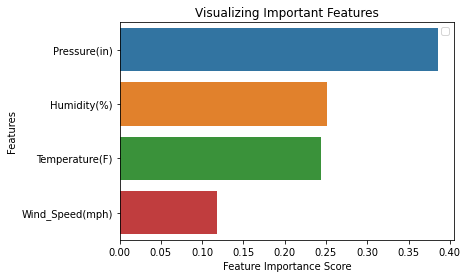

In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)

# Creating a bar plot, displaying only the top k features
k=10
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:k])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

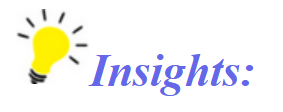

## Summary and conclusion

### -No Data for New York city.

### -most of the accidents happend during the day.

###-A high percentage of accident happened  between 15:00 to 17:00.

### -The Accidents chances are higher on the end of the year.

### -most of the accidents happend in the right side of the road.

### -Surprisingly, most accidents happened when the weather was 'fair'. Perhaps weather (bad weather) was not a big contributing factor to accidents.


### To sum up, I built a decent model to predict accident risk, but what can we do with it? There are numerous possible applications, including the following that we have considered for applications:

### -Safe route planning

### -Emergency vehicle allocation

### -Roadway design

### -Where to place additional signage